In [259]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import csv
from datetime import datetime

# step01: load the original dataset (for preprocessing )
dataframe = pd.read_csv(r'C:\Users\Acer\Desktop\ML_PROJECT\BDD-original.csv',error_bad_lines=False)
dataset = dataframe.values

#step02: split into input (X) and output (Y) variables
Y = dataset[:,7:8]
H=dataset[:,6:7]
X = dataset[:,0:6] #excluding the 7th features because it representes date and time , that can't be handled by pyhton 

normalized = preprocessing.normalize(X)  #print("Normalized Data = ", normalized)
Y=Y/np.max(Y) #normalizing the output (by the max value) 
D=np.concatenate((normalized,Y),axis=1)



#step03: exporting the normalized data set into a csv file

out = open(r"C:\Users\Acer\Desktop\ML_PROJECT\BDD-normalisé.csv", "w")
outw = csv.writer(out)
#outw.writerow(X)
for i in D:                          # Pour chaque ligne du tableau...  
        outw.writerow(i)                # Mettre dans la variable ecrire cette nouvelle ligne      

        
#step04: load the normalized dataset
dataframe = pd.read_csv(r'C:\Users\Acer\Desktop\ML_PROJECT\BDD-normalisé.csv',error_bad_lines=False) #
d = dataframe.values


#step05: split into input (X) and output (Y) variables
X = d[:,0:6]

Y = d[:,6:7]

print(X)
 

[[0.         0.96800713 0.         0.         0.25090038 0.00334534]
 [0.         0.95493719 0.         0.         0.29678965 0.00329766]
 [0.         0.95509655 0.         0.         0.29627646 0.00329196]
 ...
 [0.         0.99999349 0.         0.         0.00360735 0.        ]
 [0.         0.95127232 0.         0.         0.30787726 0.01710429]
 [0.         0.95147383 0.         0.         0.3070481  0.02046987]]


In [189]:
#step06: Deviding the data set into training, validation and test data
from sklearn.model_selection import train_test_split

# traning 67% and test 33%
X_train,  X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.33, random_state=1) 

#print(X_train)
#print(y_train.shape)
#print(y_test.shape)


In [211]:
#step07: initialasing the parameters vector theta 
theta= np.random.rand(6,1) 
#theta=theta.reshape(1,6)

#print(theta)

In [212]:
def hypothese(x, theta):  
    return x.dot(theta)

In [213]:
print(hypothese(X_train, theta))

[[0.19710989]
 [0.19714678]
 [0.23683541]
 ...
 [0.19710662]
 [0.20953823]
 [0.24145285]]


In [214]:
def cost_function(X, Y, theta):
    m = len(Y)
    first_pr= hypothese(X,theta)-Y
    cos = (np.sum(first_pr  ** 2))/(2 * m)
    return cos

In [215]:
cost_function(X_train, y_train, theta)

0.06282142409840552

In [216]:
def gradient_descent(x,y,theta,alpha,iteration): 
    cost_iter= np.zeros(iteration)
    
    for i in range(0,iteration):
        m =len(y)
        theta=theta-alpha * (1/m*x.T.dot(hypothese(x,theta)-y))
        cost_iter[i] =cost_function(x,y,theta)
    return theta, cost_iter

In [217]:
#gradient_descent(X_train,y_train,theta,0.5,100)

In [250]:
#MAIN FUNCTION
#1: intialize learning_rate alpha
alpha = 1
ite = 5000
newTheta, cost_history = gradient_descent(X_train, y_train, theta, alpha, ite )

print(newTheta)
cost_f=cost_function(X_train,y_train,newTheta)
print(cost_f)


[[0.38588074]
 [0.42509869]
 [0.40039244]
 [0.92662701]
 [0.17967322]
 [0.27633041]]
0.037036876961464904


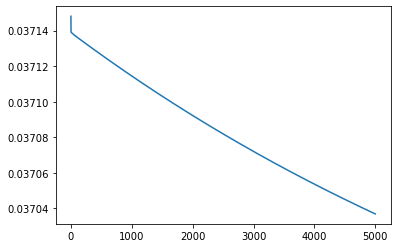

In [251]:
#plotting cost_history function/iteration
import matplotlib.pyplot as plt 
plt.plot(range(0,ite),cost_history )
plt.show()


In [252]:
y_by_model = hypothese(X_test,newTheta)
y_by_model=np.round(y_by_model, 1)
graph = pd.DataFrame(list(zip(y_test, y_by_model)), columns =['Real_Traffic_Value', 'Hypothese_Values']) 
pd.set_option('display.max_columns', 500)
graph.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,15657,15658,15659,15660,15661,15662,15663,15664,15665,15666,15667,15668,15669,15670,15671,15672,15673,15674,15675,15676,15677,15678,15679,15680,15681,15682,15683,15684,15685,15686,15687,15688,15689,15690,15691,15692,15693,15694,15695,15696,15697,15698,15699,15700,15701,15702,15703,15704,15705,15706,15707,15708,15709,15710,15711,15712,15713,15714,15715,15716,15717,15718,15719,15720,15721,15722,15723,15724,15725,15726,15727,15728,15729,15730,15731,15732,15733,15734,15735,15736,15737,15738,15739,15740,15741,15742,15743,15744,15745,15746,15747,15748,15749,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759,15760,15761,15762,15763,15764,15765,15766,15767,15768,15769,15770,15771,15772,15773,15774,15775,15776,15777,15778,15779,15780,15781,15782,15783,15784,15785,15786,15787,15788,15789,15790,15791,15792,15793,15794,15795,15796,15797,15798,15799,15800,15801,15802,15803,15804,15805,15806,15807,15808,15809,15810,15811,15812,15813,15814,15815,15816,15817,15818,15819,15820,15821,15822,15823,15824,15825,15826,15827,15828,15829,15830,15831,15832,15833,15834,15835,15836,15837,15838,15839,15840,15841,15842,15843,15844,15845,15846,15847,15848,15849,15850,15851,15852,15853,15854,15855,15856,15857,15858,15859,15860,15861,15862,15863,15864,15865,15866,15867,15868,15869,15870,15871,15872,15873,15874,15875,15876,15877,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889,15890,15891,15892,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902,15903,15904,15905,15906
Real_Traffic_Value,[0.6833791208791209],[0.13186813186813187],[0.9152472527472528],[0.3956043956043956],[0.6137362637362638],[0.6361263736263736],[0.6447802197802198],[0.4016483516483517],[0.12857142857142856],[0.1888736263736264],[0.12087912087912088],[0.2451923076923077],[0.6034340659340659],[0.6615384615384615],[0.5728021978021978],[0.7785714285714286],[0.6247252747252747],[0.08722527472527472],[0.4114010989010989],[0.0385989010989011],[0.3342032967032967],[0.3682692307692308],[0.6798076923076923],[0.4304945054945055],[0.4516483516483517],[0.11140109890109892],[0.7909340659340659],[0.4214285714285714],[0.4394230769230769],[0.656456043956044],[0.07637362637362638],[0.4151098901098901],[0.7479395604395604],[0.2935439560439561],[0.5903846153846154],[0.4072802197802198],[0.28104395604395604],[0.6340659340659339],[0.6296703296703297],[0.08722527472527472],[0.9668956043956044],[0.0782967032967033],[0.8457417582417582],[0.4600274725274725],[0.7649725274725274],[0.31868131868131866],[0.6623626373626373],[0.7185439560439559],[0.6652472527472527],[0.7553571428571428],[0.7711538461538462],[0.08804945054945056],[0.4773351648351649],[0.12225274725274725],[0.714010989010989],[0.5791208791208792],[0.5979395604395604],[0.09752747252747253],[0.28104395604395604],[0.11991758241758242],[0.6618131868131868],[0.3565934065934066],[0.20041208791208792],[0.7631868131868131],[0.2353021978021978],[0.6495879120879121],[0.6387362637362637],[0.6848901098901099],[0.10508241758241757],[0.3896978021978022],[0.2986263736263736],[0.6122252747252748],[0.10535714285714286],[0.17348901098901098],[0.0903846153846

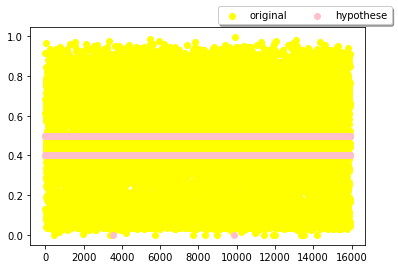

In [253]:
#plotting the original value of y (y_test)
y_test=np.array(y_test)
plt.figure()
plt.scatter(list(range(0, len(X_test))),y_test, color='yellow',label = "original")    
plt.scatter(list(range(0, len(X_test))), y_by_model, color='pink' ,label = "hypothese")
plt.legend(loc='upper center', bbox_to_anchor=(0.82, 1.12), ncol=3, shadow=True) 
plt.show()



In [254]:
from sklearn.metrics import r2_score


coefficient_of_dermination = r2_score(y_test, y_by_model)
coefficient_of_dermination

-0.019291630547285665

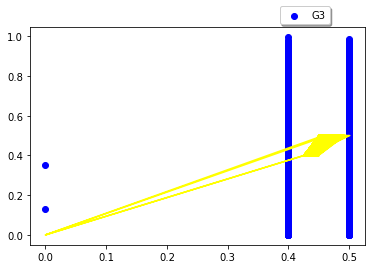

In [255]:
fig, ax = plt.subplots()
ax.scatter(y_by_model,y_test , color='blue',label = "G3")
ax.plot(hypothese(X_test,newTheta), y_by_model,color='yellow')
plt.legend(loc='upper center', bbox_to_anchor=(0.82, 1.12),
          ncol=3, shadow=True) 

plt.show()